In [1]:
from sdxl_rewrite import UNet2DConditionModel

import torch
from diffusers import DiffusionPipeline


pipe = DiffusionPipeline.from_pretrained(
        "stabilityai/stable-diffusion-xl-base-1.0",
        torch_dtype=torch.float16,
        use_safetensors=True,
        variant="fp16",
).to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [2]:
unet_new = UNet2DConditionModel().cuda().half()
unet_new.load_state_dict(pipe.unet.state_dict())

<All keys matched successfully>

  0%|          | 0/50 [00:00<?, ?it/s]

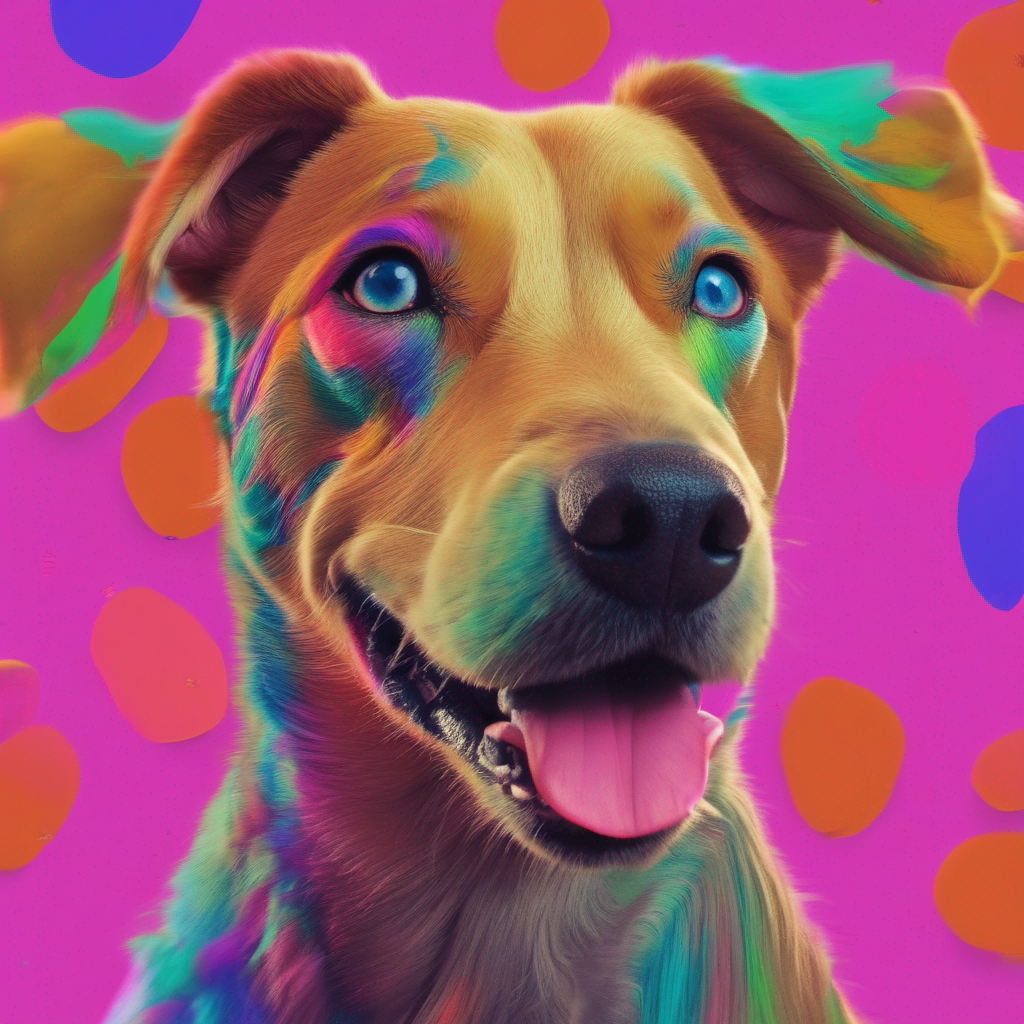

In [3]:
pipe.unet = unet_new
pipe("a colorful, movie like photo of dog").images[0]